In [1]:
import yfinance as yf
import pandas as pd
import datetime
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
from pandas_datareader import data
from dask.distributed import Client
from dask.distributed import as_completed
import openpyxl
import xlsxwriter
import pandas_datareader.data as web
import statsmodels.tsa.stattools as ts
from numpy import cumsum, log, polyfit, sqrt, std, subtract
import pandas_market_calendars as mcal
import os
import sqlite3
import matplotlib.pyplot as plt

In [2]:
end_ = datetime.today()
#start = end - relativedelta(years=2) - relativedelta(days=3)
start_ = end_ - relativedelta(months=64)
start_X2_ = end_ - relativedelta(months=64*2)

nyse = mcal.get_calendar('NYSE')
nyse_dates = nyse.schedule(start_date=start_, end_date=end_)

nyse_X2 = mcal.get_calendar('NYSE')
nyse_dates_X2 = nyse.schedule(start_date=start_X2_, end_date=end_)

start = nyse_dates.index[0]
start_X2 = nyse_dates_X2.index[0]

end = nyse_dates.index[-1]
print(start.strftime('%Y-%m-%d'))
print(end.strftime('%Y-%m-%d'))

2017-03-23
2022-07-22


In [3]:
"""
db_filename = '.\\data\\interim\\todo.db'

db_is_new = not os.path.exists(db_filename)

conn = sqlite3.connect(db_filename)

if db_is_new:
    print('Need to create schema')
else:
    print('Database exists, assume schema does, too.')

conn.close()
"""

"\ndb_filename = '.\\data\\interim\\todo.db'\n\ndb_is_new = not os.path.exists(db_filename)\n\nconn = sqlite3.connect(db_filename)\n\nif db_is_new:\n    print('Need to create schema')\nelse:\n    print('Database exists, assume schema does, too.')\n\nconn.close()\n"

In [4]:
dict_sectors = {'Basic Materials':'VAW', 'Communication Services':'VOX', 'Consumer Cyclical':'VCR',
       'Consumer Defensive':'VDC', 'Energy':'VDE', 'Financial Services':'VFH', 'Healthcare':'VHT',
       'Industrials':'VIS', 'Real Estate':'VNQ', 'Technology':'VGT', 'Utilities':'VPU', 'error':'error'}

dict_indexes = {'SPTM':'SP1500', 'SPY':'SP500', 'SLY':'SP600', 'MDYG':'SP400','error':'error'}

invert_dict_indexes = {v: k for k, v in dict_indexes.items()}

dict_sectors_reverse = {'VAW':'Basic Materials',
 'VOX':'Communication Services',
 'VCR':'Consumer Cyclical',
 'VDC':'Consumer Defensive',
 'VDE':'Energy',
 'VFH':'Financial Services',
 'VHT':'Healthcare',
 'VIS':'Industrials',
 'VNQ':'Real Estate',
 'VGT':'Technology',
 'VPU':'Utilities',
 'error': 'error'}

In [5]:
index_names = ['SP1500', 'SP500', 'SP600', 'SP400']
indexes = ['SPTM','SPY','SLY','MDYG']
sector_names = ['Communication Services ETF', 'Consumer Discretionary ETF', 'Consumer Staples ETF', 'Energy ETF', 'Financials ETF', 'Health Care ETF', 'Industrials ETF', 'Information Technology ETF', 'Materials ETF', 'Real Estate ETF', 'Utilities ETF']
sectors = ['VOX','VCR','VDC','VDE','VFH','VHT','VIS','VGT','VAW','VNQ','VPU']

etf_bonds = ['LQD', 'AGG', 'NEAR', 'IUSB', 'ISTB', 'IMTB', 'ILTB', 'GBF']
etf_muni_bonds = ['MUB', 'SUB', 'MEAR']

etf_treasuries = ['AGZ', 'GOVT', 'BIL', 'SHV', 'SHY', 'IEI', 'IEF', 'TLT']

#M1_MONEY_MULTIPLIER = M1NS/BOGMBASE

FRED_Indicators = [
"ASPUS",\
"AWHAETP",\
"B432RG3A086NBEA",\
"BAA10Y",\
"BACDINA066MNFRBNY",\
"BACTSAMFRBDAL",\
"BAMLC0A0CM",\
"BAMLCC0A1AAATRIV",\
"BAMLCC0A4BBBTRIV",\
"BAMLH0A3HYC",\
"BAMLHYH0A0HYM2TRIV",\
"BOGMBASE",\
"BOGZ1FA105015103Q",\
"BOGZ1FA145050005Q",\
"BOGZ1FA205050005Q",\
"BOGZ1FA315050005Q",\
"BOGZ1FA385050005Q",\
"BOGZ1FL105015105Q",\
"BUSAPPWNSACA",\
"BUSLOANS",\
"CASTHPI",\
"CES0500000003",\
"CES4348400001",\
"CFNAI",\
"CFNAIDIFF",\
"CFSBCACTIVITYMFG",\
"CILACBQ158SBOG",\
"CIVPART",\
"COMREPUSQ159N",\
"CONSUMER",\
"CP",\
"CPALTT01USQ657N",\
"CPIAUCSL",\
"CSCICP03USM665S",\
"CSUSHPINSA",\
"CUSR0000SEHA",\
"CUUR0000SEHA",\
"DALLCIACBEP",\
"DCOILBRENTEU",\
"DCOILWTICO",\
"DEXCHUS",\
"DEXUSUK",\
"DFF",\
"DFII10",\
"DGORDER",\
"DGS1",\
"DGS10",\
"DGS1MO",\
"DGS2",\
"DGS30",\
"DGS3MO",\
"DGS5",\
"DRBLACBS",\
"DRCCLACBS",\
"DRSFRMACBS",\
"DTB3",\
"DTWEXBGS",\
"EMRATIO",\
"ERENTUSQ176N",\
"ETOTALUSQ176N",\
"FEDFUNDS",\
"FGCCSAQ027S",\
"FPCPITOTLZGUSA",\
"GASREGW",\
"GDPC1",\
"GFDEBTN",\
"GFDEGDQ188S",\
"GOLDAMGBD228NLBM",\
"GVZCLS",\
"HDTGPDUSQ163N",\
"HOSMEDUSM052N",\
"IC4WSA",\
"ICSA",\
"IIPUSNETIQ",\
"INDPRO",\
"INTDSRUSM193N",\
"IRLTLT01USM156N",\
"KCFSI",\
"LES1252881600Q",\
"LEU0252918500Q",\
"LFWA64TTUSM647S",\
"LRUN64TTUSQ156S",\
"LXXRCSA",\
"M1",\
"M1V",\
"M1NS",\
"M2V",\
"MABMM301USM189S",\
"MANMM101USA189S",\
"MEFAINUSA672N",\
"MEHOINUSA672N",\
"MEPAINUSA672N",\
"MICH",\
"MOGMBASE",\
"MORTGAGE30US",\
"MPRIME",\
"MSPUS",\
"MZMSL",\
"NEWORDER",\
"NFCI",\
"NROU",\
"NYSTHPI",\
"PAYEMS",\
"PCE",\
"PERMIT",\
"POP",\
"POPTOTUSA647NWDB",\
"PPIACO",\
"PRFI",\
"PSAVERT",\
"Q10096USQ144NNBR",\
"RECPROUSM156N",\
"RSAHORUSQ156S",\
"SPCS20RSA",\
"STLFSI2",\
"T10Y2Y",\
"T10Y3M",\
"T10YIE",\
"T5YIE",\
"T5YIFR",\
"TB3MS",\
"TCU",\
"TDSP",\
"TEDRATE",\
"TOTALSA",\
"TREAST",\
"TTLHH",\
"TWEXB",\
"UMCSENT",\
"U6RATE",\
"UNRATE",\
"USALOLITONOSTSAM",\
"USPHCI",\
"USREC",\
"USROA",\
"USROE",\
"USSLIND",\
"USSTHPI",\
"VIXCLS",\
"VXVCLS",\
"WDFUELLA",\
"WGS3MO",\
"WILLLRGCAPVAL",\
"WILLMICROCAPPR",\
"WPU0911",\
"WPUSI019011",\
"WPU101",\
"WTB3MS"    
]

currencies = ['EURUSD=X','GBPUSD=X','AUDUSD=X','BRLUSD=X','JPY=X']
#doesn't work ,'B0=F'
future_commodities_nSP500 = list(['UUP','^IRX','^GSPC','ES=F','YM=F','NQ=F','RTY=F','ZB=F','ZN=F','ZF=F','ZT=F','GC=F','MGC=F','SI=F','SIL=F','PL=F','HG=F','PA=F','CL=F','HO=F','NG=F','RB=F','BZ=F','ZC=F','ZO=F','KE=F','ZR=F','ZM=F','ZL=F','ZS=F','GF=F','HE=F','LE=F','CC=F','KC=F','CT=F','LBS=F','OJ=F','SB=F'])

etf_bonds = [*etf_bonds,*etf_muni_bonds,*etf_treasuries]

In [6]:
SP500ticker_list = pd.read_html('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
SP600ticker_list = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_600_companies')[1]
SP400ticker_list = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_400_companies')[0]


In [7]:
sp500 = SP500ticker_list['Symbol']
sp500 = [w.replace('.', '-') for w in sp500]
sp600 = SP600ticker_list['Ticker symbol']
sp600 = [w.replace('.', '-') for w in sp600]
sp400 = SP400ticker_list['Ticker symbol']
sp400 = [w.replace('.', '-') for w in sp400]


In [8]:
len(sp500)+len(sp600)+len(sp400)

1505

In [9]:
print(len(sp500))
SP1500 = list()
SP1500.extend(sp500)
sp600 = list(set(sp600).difference(SP1500))
print(len(sp600))
SP1500.extend(sp600)
sp400 = list(set(sp400).difference(SP1500))
print(len(sp400))
SP1500.extend(set(sp400).difference(SP1500))

503
601
401


In [10]:
#>.5The time series is mean reverting
#=.5 time series is a Geometric Brownian Motion
#<.5 time series is trending

def hurst(ts):
    """
    Returns the Hurst Exponent of the time series vector ts

    Parameters
    ----------
    ts : `numpy.array`
        Time series upon which the Hurst Exponent will be calculated

    Returns
    -------
    'float'
        The Hurst Exponent from the poly fit output
    """
    # Create the range of lag values
    lags = range(2, 100)

    # Calculate the array of the variances of the lagged differences
    tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]

    # Use a linear fit to estimate the Hurst Exponent
    poly = polyfit(log(lags), log(tau), 1)

    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

In [11]:
sp1500_index_df = pd.DataFrame()

lists = ["sp500","sp600","sp400"]

for l in lists:
    if(l=='sp500'):
        df = pd.DataFrame(sp500,columns=['Symbol'])
        print(len(df))
        #range_ = 
        #print(range_)
        df['Market Index'] = pd.Series(["SP500" for x in range(0,len(df.index),1)])
    elif(l=='sp600'):
        df = pd.DataFrame(np.array(sp600),columns=['Symbol'])        
        print(len(df))        
        df['Market Index'] = pd.Series(["SP600" for x in range(len(df.index))])
        df.index = range(len(sp500),(len(sp500)+len(df.index)),1)        
    else:
        df = pd.DataFrame(np.array(sp400),columns=['Symbol'])
        print(len(df))
        df['Market Index'] = pd.Series(["SP400" for x in range(len(df.index))])
        df.index = range((len(sp500)+len(sp600)),(len(sp500)+len(sp600)+len(df.index)),1)
    sp1500_index_df = pd.concat([sp1500_index_df,df],axis=0)

503
601
401


In [12]:
len(sp1500_index_df)-len(SP1500)

0

In [13]:
def Fred_Data(npa):
    name = npa[0]
    start_ = npa[1]
    end_ = npa[2]
    nyse_dates_ = npa[3]
    
    temp = web.DataReader(str(name), 'fred', start_, end_)
    #temp = web.DataReader(npa[1][0],'fred',start,end)
    temp = temp.asfreq('D').interpolate(method='time',limit_direction='forward',limit_area='inside').reindex(nyse_dates_.index)
    temp.columns = ['Value']
    #temp.index = pd.to_datetime(temp.index)
    
    #temp['Symbol'] = name
    
    #print(temp)
    #temp_new = temp.asfreq('D').interpolate(method='time')    
    temp_dates = pd.date_range(temp.index[0].strftime('%Y-%m-%d'), temp.index[-1].strftime('%Y-%m-%d'), freq='D').map(lambda t: t.strftime('%Y-%m-%d'))
    nyse_inbetween_temp_dates = nyse_dates_.index[(nyse_dates_.index >= temp_dates[0]) & (nyse_dates_.index <= temp_dates[-1])]
    temp_new = temp.reindex(nyse_inbetween_temp_dates)
    temp_new['Symbol'] = name
    
    #temp = temp.resample(frequency).mean().dropna()
    return(temp_new)
    #return(temp)

In [14]:

def dl(npa):
    name = npa[0]
    start_ = npa[1]
    end_ = npa[2]
    nyse_dates_ = npa[3]
    subset = yf.download(name, start=start_, end=end_, auto_adjust=True).iloc[:, :6].dropna(axis=0, how='any')
    
    temp_new = subset.asfreq('D').interpolate(method='time',limit_area='inside').reindex(nyse_dates_.index)
    temp_dates = pd.date_range(subset.index[0].strftime('%Y-%m-%d'), subset.index[-1].strftime('%Y-%m-%d'), freq='D').map(lambda t: t.strftime('%Y-%m-%d'))
    nyse_inbetween_temp_dates = nyse_dates_.index[(nyse_dates_.index >= temp_dates[0]) & (nyse_dates_.index <= temp_dates[-1])]
    temp_new = temp_new.reindex(nyse_inbetween_temp_dates)
    subset_ = temp_new
    subset_['Symbol'] = name

    return (subset_)
    
def dl2(assets):

    yahoo_financials = YahooFinancials(assets)

    data = yahoo_financials.get_historical_price_data(start_date=start_date.strftime('%Y-%m-%d'), end_date=end_date.strftime('%Y-%m-%d'), time_interval='daily')
    return(data)

In [15]:
def getStock(npa):
    symbol = npa[0]
    start_=npa[1]
    end_=npa[2]
    
    data_ = yf.download(symbol, start=start_,end=end_)
  
    return([symbol,data_])

In [16]:
def getTickerData(npa):
    symbol = npa[0]
    
    stock_data = yf.Ticker(symbol) 
    return([symbol,stock_data])

In [17]:
def getSector(npa):
    #position = npa[0]
    symbol = npa[0]
    #start_=npa[2]
    #end_=npa[3]
    
    tickerdata = yf.Ticker(symbol)
    
    if 'sector' in tickerdata.info:
        sector = tickerdata.info['sector']
    else:
        sector = 'error'

    if 'industry' in tickerdata.info:
        industry = tickerdata.info['industry']
    else:
        industry = 'error'

    return([symbol,sector,industry])

In [18]:
def derive_price_supply_trends(npa_):
    name = npa_[0]
    data = npa_[1]
    nyse_dates_ = npa_[2]
    
    temp_new = data.asfreq('D').interpolate(method='time',limit_area='inside').reindex(nyse_dates_.index)
    temp_dates = pd.date_range(data.index[0].strftime('%Y-%m-%d'), data.index[-1].strftime('%Y-%m-%d'), freq='D').map(lambda t: t.strftime('%Y-%m-%d'))
    nyse_inbetween_temp_dates = nyse_dates_.index[(nyse_dates_.index >= temp_dates[0]) & (nyse_dates_.index <= temp_dates[-1])]
    temp_new = temp_new.reindex(nyse_inbetween_temp_dates)
    
    data_ = temp_new
    data_['Symbol'] = name

    """
    if(np.sum(duplicates==names_prices[n])>0):
        #potential duplicate
        if((np.sum((np.unique(prices_df['Symbol']))==n))>0):
            pass
        else:
            prices_df = pd.concat([prices_df,data_],axis=0)            
    else:
    """
    
    data_['buy_volume_pct'] = (data_['Adj Close']-data_['Low'])/(data_['High']-data_['Adj Close'])
    data_['sell_volume_pct'] = (data_['Adj Close']-data_['High'])/(data_['High']-data_['Low'])
    
    data_['daily_buy_vol'] = data_['buy_volume_pct']*data_['Volume']
    
    data_['daily_sell_vol'] = data_['sell_volume_pct']*data_['Volume']
    
    data_['net_daily_vol'] = data_['daily_buy_vol']+data_['daily_sell_vol']
    
    data_['20td_trend_vol'] = data_['net_daily_vol'].rolling(20).sum()
    
    data_['20td_tot_daily_vol'] = data_['Volume'].rolling(20).sum()
    
    data_['20td_trend_vol'] = data_['net_daily_vol'].rolling(20).sum()
    
    data_['20td_trend_vol_factor'] = data_['20td_trend_vol']/data_['20td_tot_daily_vol']
    
    data_['20td_tvf_rng_div_2'] = (data_['20td_trend_vol_factor'].rolling(20).max()-data_['20td_trend_vol_factor'].rolling(20).min())/2
    
    data_['20td_tvf_vel'] = data_['20td_trend_vol_factor']/data_['20td_tvf_rng_div_2']    
    
    data_['trailing_1yr_max'] = (pd.DataFrame(data_)['High']).rolling(252).max()
    data_['MIN_Lookback_One_Year'] = data_['trailing_1yr_max'].rolling(252).min()
    #data_['MIN_Lookback_6_Months'] = data_['trailing_1yr_max'].rolling(126).min()
    data_['MIN_Lookback_2_Months'] = data_['trailing_1yr_max'].rolling(42).min()
    data_['MIN_Lookback_1_Months'] = data_['trailing_1yr_max'].rolling(21).min()

    data_['trailing_1yr_min'] = (pd.DataFrame(data_)['Low']).rolling(252).min()
    
    data_['supply_trend_1yr'] = pd.DataFrame(data_)['Adj Close']-(pd.DataFrame(data_)['High']).rolling(252).min()
    
    #data_['supply_trend_180d'] = pd.DataFrame(data_)['Adj Close']-(pd.DataFrame(data_)['High']).rolling(126).min()
    
    #data_['supply_trend_90d'] = pd.DataFrame(data_)['Adj Close']-(pd.DataFrame(data_)['High']).rolling(63).min()
    
    data_['supply_trend_60d'] = pd.DataFrame(data_)['Adj Close']-(pd.DataFrame(data_)['High']).rolling(42).min()
    
    data_['supply_trend_30d'] = pd.DataFrame(data_)['Adj Close']-(pd.DataFrame(data_)['High']).rolling(21).min()

    data_['trailing_60d_max'] = (pd.DataFrame(data_)['High']).rolling(42).max()
    data_['trailing_60d_min'] = (pd.DataFrame(data_)['Low']).rolling(42).min()
    
    data_['trailing_30d_max'] = (pd.DataFrame(data_)['High']).rolling(21).max()
    data_['trailing_30d_min'] = (pd.DataFrame(data_)['Low']).rolling(21).min()
    
    data_['90dSMA'] = (pd.DataFrame(data_)['Adj Close']).rolling(63).mean()
    
    data_['90dSDev'] = (pd.DataFrame(data_)['Adj Close']).rolling(63 ).std()
    
    data_['TP'] = (data_['Adj Close'] + data_['Low'] + data_['High'])/3
    data_['21dstdTP'] = data_['TP'].rolling(21).std(ddof=0)
    data_['21dMA-TP'] = data_['TP'].rolling(21).mean()
    data_['21dBOLU'] = data_['21dMA-TP'] + 2*data_['21dstdTP']
    data_['21dBOLD'] = data_['21dMA-TP'] - 2*data_['21dstdTP']    

    data_['trailing_risk_40d_max'] = (pd.DataFrame(data_)['High']).rolling(40).max()
    data_['trailing_risk_40d_min'] = (pd.DataFrame(data_)['Low']).rolling(40).min()
    
    data_['risk_per_share'] = data_['trailing_risk_40d_max']-data_['trailing_risk_40d_min']
    
    data_['30d_vol'] = (pd.DataFrame(data_)['Volume']).rolling(21).sum()
    data_['30d_vol_2yr'] = data_['30d_vol'].rolling(512).mean()
    data_['volume_factor'] = data_['30d_vol']/data_['30d_vol_2yr']
    
    #data_['1YMF'] = (data_['Adj Close']-data_['MIN_Lookback_One_Year']) + (data_['Adj Close']-data_['MIN_Lookback_6_Months']) + (data_['Adj Close']-data_['MIN_Lookback_2_Months']) + (data_['Adj Close']-data_['MIN_Lookback_1_Months'])
    data_['1YMF'] = (data_['Adj Close']-data_['MIN_Lookback_One_Year']) + (data_['Adj Close']-data_['MIN_Lookback_2_Months']) + (data_['Adj Close']-data_['MIN_Lookback_1_Months'])
    
    data_['risk_trend_factor'] = data_['1YMF']/data_['risk_per_share']
    
    return(data_)

In [53]:
def calculateMetrics(data_):
    
    df_line = data_[['Symbol','buy_volume_pct','sell_volume_pct','daily_buy_vol','daily_sell_vol','net_daily_vol','20td_trend_vol','20td_tot_daily_vol','20td_trend_vol','20td_trend_vol_factor','20td_tvf_rng_div_2','20td_tvf_vel','MIN_Lookback_One_Year', 'MIN_Lookback_2_Months', 'MIN_Lookback_1_Months','risk_trend_factor','risk_per_share','volume_factor','Adj Close','21dBOLD','21dMA-TP','21dBOLU','90dSMA','90dSDev']].iloc[[-1]].reset_index().set_index('Symbol')
    name = df_line.index[0]
    adf = ts.adfuller(data_['Adj Close'].values)[1]
    
    hurst_ = hurst(data_['Adj Close'].values)
    
    #temp_ = prices_df[prices_df['Symbol']=='GO']
    #temp__ = temp_[['Symbol','MIN_Lookback_One_Year', 'MIN_Lookback_2_Months', 'MIN_Lookback_1_Months','risk_trend_factor','risk_per_share','volume_factor','Adj Close','21dBOLD','21dMA-TP','21dBOLU','90dSMA','90dSDev']].iloc[[-1]].reset_index().set_index('Symbol')

    try:
        adf = ts.adfuller(data_['Adj Close'].values)[1]
    except:
        adf = 'error'

    try:
        hurst_ = hurst(data_['Adj Close'].values)
    except:
        hurst_ = 'error'

    temp = pd.concat([df_line,pd.DataFrame([adf],index=[name],columns=['adf']),pd.DataFrame([hurst_],index=[name],columns=['hurst'])],axis=1)
    temp.columns = ['Date',*temp.columns[1:]]
    return(temp)
    
    """
    n_ = data_df['Symbol'].values[-1]
    
    latest_p = pd.DataFrame(data_df)['Adj Close'][-1]
    oneYearDate = pd.DataFrame(data_df)['Adj Close'][[-1]].index[0] - relativedelta(years=1)
    
    #separate subset for past year.
    past_year = data_df[data_df.index>=oneYearDate.strftime('%Y-%m-%d')]
    
    #np.max(npa[np.where(np.array(names_prices)=='GBX')[0][0]]['High'])
    #max_2y = pd.DataFrame(data_df)['High'].rolling(504).max()[-1]
    #min_2y = pd.DataFrame(data_df)['Low'].rolling(504).min()[-1]
    
    #quantiles_close_2y = data_df['Adj Close'].rolling(504).quantile(q=[0, .02, .09, .25, .5, .75, .91, .98, 1])[-1]
    #quantiles_close_2y = data_df['Adj Close'].quantile(q=[0, .02, .09, .25, .5, .75, .91, .98, 1])
    
    std_2y = pd.DataFrame(data_df)['Adj Close'].rolling(504).std()[-1]
    mean_2y = pd.DataFrame(data_df)['Adj Close'].rolling(504).mean()[-1]
    
    #max_1y = past_year['High'].rolling(252).max()[-1]
    #min_1y = past_year['Low'].rolling(252).min()[-1]
    
    #quantiles_close_1y = data_df['Adj Close'].rolling(252).quantile(q=[0, .02, .09, .25, .5, .75, .91, .98, 1])[-1]
    #quantiles_close_1y = past_year['Adj Close'].quantile(q=[0, .02, .09, .25, .5, .75, .91, .98, 1])
    
    std_1y = past_year['Adj Close'].rolling(252).std()[-1]
    mean_1y = past_year['Adj Close'].rolling(252).mean()[-1]
    
    risk_trend_factor = data_df['risk_trend_factor'][-1]
    
    supply_trend_1yr = data_df['supply_trend_1yr'][-1]
    #supply_trend_180d = data_df['supply_trend_180d'][-1]
    #supply_trend_90d = data_df['supply_trend_90d'][-1]
    supply_trend_60d = data_df['supply_trend_60d'][-1]
    supply_trend_30d = data_df['supply_trend_30d'][-1]
    
    MIN_Lookback_One_Year = data_df['MIN_Lookback_One_Year'][-1]
    #MIN_Lookback_6_Months = data_df['MIN_Lookback_6_Months'][-1]
    MIN_Lookback_2_Months = data_df['MIN_Lookback_2_Months'][-1]
    MIN_Lookback_1_Months = data_df['MIN_Lookback_1_Months'][-1]
    
    adf = ts.adfuller(data_df['Adj Close'].values)[1]
    
    hurst_ = hurst(data_df['Adj Close'].values)

    volume_factor = data_df['volume_factor'][-1]
    vol_30d = data_df['30d_vol'][-1]
    vol_30d_2yr = data_df['30d_vol_2yr'][-1]
    
    pct_2yr = (latest_p - min_2y)/(max_2y-min_2y)
    pct_1yr = (latest_p - min_1y)/(max_1y-min_1y)
    
    ymf = data_df['1YMF'][-1]
    
    return([n_,max_2y,min_2y,std_2y,mean_2y,max_1y,min_1y,std_1y,mean_1y,latest_p,*quantiles_close_2y,*quantiles_close_1y,risk_trend_factor,supply_trend_1yr,supply_trend_60d,supply_trend_30d,vol_30d_2yr,pct_1yr,pct_2yr,MIN_Lookback_One_Year, MIN_Lookback_2_Months, MIN_Lookback_1_Months,vol_30d,volume_factor,adf,hurst_,ymf])
    """

In [20]:
def extractTickerValues(npa):
    
    n_ = npa[0]
    r_ = npa[1]
    #print(r_)
    print(n_)

    subset = pd.DataFrame([r_.info])

    others = ['quarterly_balance_sheet','quarterly_cashflow','quarterly_dividends','quarterly_earnings','quarterly_financials','mutualfund_holders','options','sustainability']

    o_items = []

    #print(r_)
    for o in others:
        if(np.sum(np.array(dir(r_))==[o])>0):
            o_item = getattr(r_, o)
            o_items.append([o,o_item])            

    
    values = pd.DataFrame()

    trackers = ['beta','currentRatio','debtToEquity','dividendRate','dividendYield','earningsGrowth','ebitda','ebitdaMargins','forwardPE','freeCashflow','grossMargins','grossProfits','heldPercentInstitutions','industry','marketCap','operatingCashflow','operatingMargins','payoutRatio','pegRatio','priceToBook','priceToSalesTrailing12Months','profitMargins','quickRatio','returnOnAssets','returnOnEquity','revenueGrowth','revenuePerShare','sector','sharesOutstanding','shortRatio','totalAssets','totalCash','totalCashPerShare','totalDebt','totalRevenue','trailingPE']

    for t in trackers:
        if(np.sum(np.where(subset.columns==t))==0):
            values = pd.concat([values,pd.DataFrame('error',index=[n_],columns=[t])],axis=1)
        else:
            values = pd.concat([values,pd.DataFrame(subset[t].values[0],index=[n_],columns=[t])],axis=1)

    return([n_,values,o_items])

In [21]:

npa = []
for f in [*future_commodities_nSP500,*currencies]:
    npa.append([f,start_X2,end])
    

client = Client('192.168.3.100:8786')
#client = Client(n_workers=4,threads_per_worker=1)
client.restart()
future = client.map(getStock, npa)
results_commodities_futures = []
#my intent was to capture future objects vs results and this gave me results
for f in as_completed(future):
    if(f.status=="error"):
        results_commodities_futures.append("error")
    else:
        results_commodities_futures.append(f.result()) 
client.close()

"""
data_['trailing_risk_40d_max'] = (pd.DataFrame(data_)['High']).rolling(40).max()
data_['trailing_risk_40d_min'] = (pd.DataFrame(data_)['Low']).rolling(40).min()
"""

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\distributed\client.py:1265: VersionMismatchWarning: Mismatched versions found

+-------------+---------------+---------------+---------------+
| Package     | client        | scheduler     | workers       |
+-------------+---------------+---------------+---------------+
| dask        | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| distributed | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| lz4         | 3.1.3         | 3.1.10        | 3.1.10        |
| python      | 3.9.7.final.0 | 3.9.9.final.0 | 3.9.9.final.0 |
| toolz       | 0.11.1        | 0.11.2        | 0.11.2        |
+-------------+---------------+---------------+---------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


"\ndata_['trailing_risk_40d_max'] = (pd.DataFrame(data_)['High']).rolling(40).max()\ndata_['trailing_risk_40d_min'] = (pd.DataFrame(data_)['Low']).rolling(40).min()\n"

In [22]:
future_commodities_nSP500_df = pd.DataFrame()

for r_df in results_commodities_futures:

        temp_df = r_df[1].asfreq('D').interpolate(method='time',limit_direction='forward',limit_area='inside').reindex(nyse_dates_X2.index)
        temp_dates = pd.date_range(temp_df.index[0].strftime('%Y-%m-%d'), temp_df.index[-1].strftime('%Y-%m-%d'), freq='D').map(lambda t: t.strftime('%Y-%m-%d'))
        nyse_inbetween_temp_dates = nyse_dates_X2.index[(nyse_dates_X2.index >= temp_dates[0]) & (nyse_dates_X2.index <= temp_dates[-1])]
        temp_new = temp_df.reindex(nyse_inbetween_temp_dates)
        temp_new['Symbol'] = r_df[0]

        future_commodities_nSP500_df = pd.concat([future_commodities_nSP500_df,temp_new],axis=0)

In [23]:
future_commodities_nSP500_pvt = pd.pivot_table(future_commodities_nSP500_df, values=['Adj Close'], index=future_commodities_nSP500_df.index,columns=['Symbol'])

In [24]:
future_commodities_nSP500_pvt.columns = future_commodities_nSP500_pvt.columns.droplevel(0)

In [25]:
tbill_df = Fred_Data(['DTB3',start_X2,end,nyse_dates])[['Value']]
tbill_df.columns = ['DTB3']


In [26]:
future_commodities_nSP500_pvt_w_Fred = pd.concat([tbill_df,future_commodities_nSP500_pvt],axis=1)
future_commodities_nSP500_pvt_w_Fred.to_csv('..\\data\\processed\\'+end.strftime('%Y-%m-%d')+'_future_commodities_nSP500_pvt_w_Fred.csv')

trending = pd.DataFrame((future_commodities_nSP500_pvt_w_Fred['^GSPC']-future_commodities_nSP500_pvt_w_Fred['^GSPC'].shift(40))>0)
trending.columns = ['trending']
trending_df = pd.concat([future_commodities_nSP500_pvt_w_Fred,trending],axis=1)
future_commodities_trending = trending_df[trending_df['trending']==True]
future_commodities_not_trending = trending_df[trending_df['trending']!=True]
future_commodities_nSP500_pvt_w_Fred.dropna(axis=1, thresh = int(.95*future_commodities_nSP500_pvt_w_Fred.shape[0]), inplace=True)

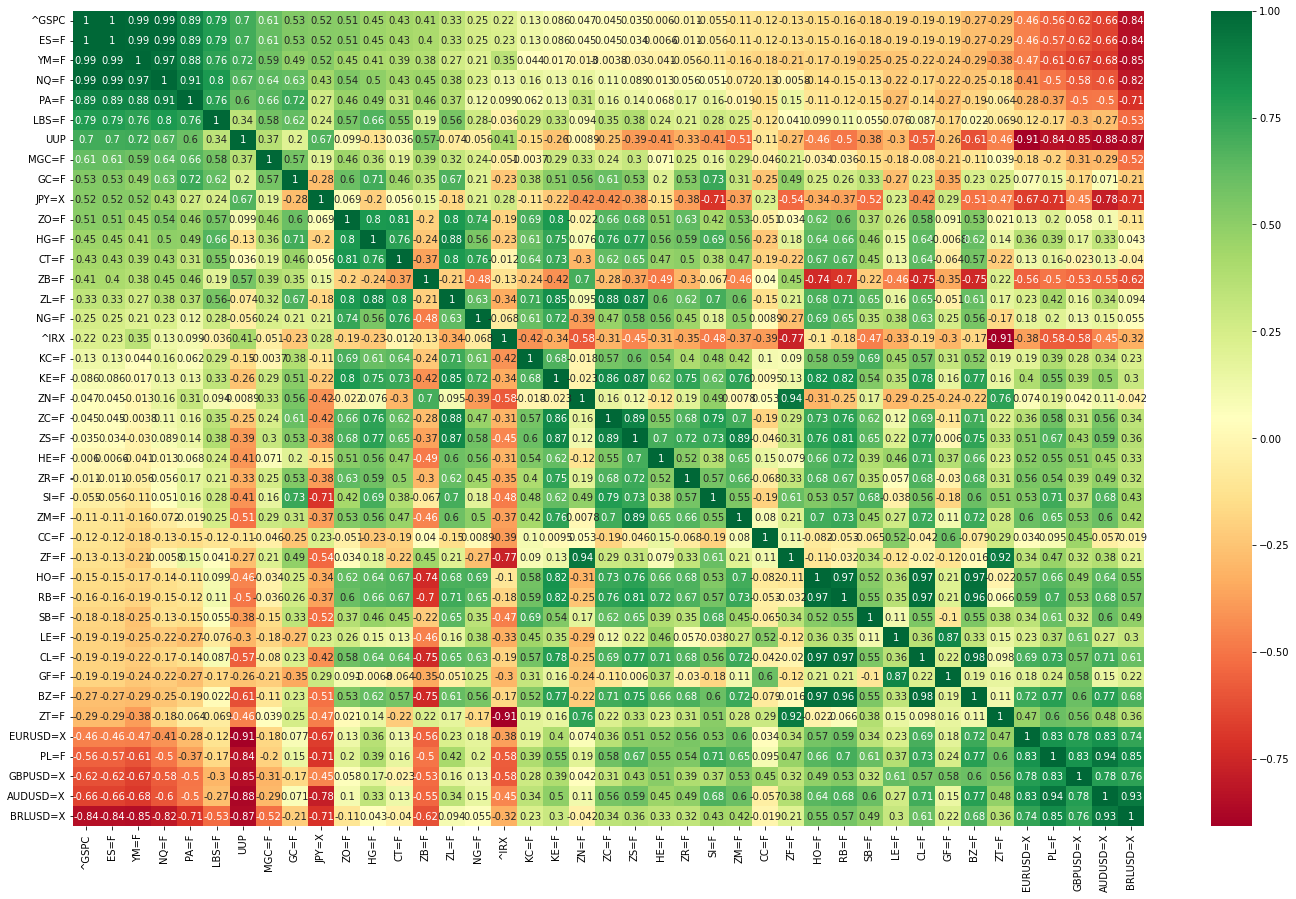

In [27]:
sorted_by_GSPC_future_commodities_corr = future_commodities_nSP500_pvt_w_Fred.corr().sort_values(by='^GSPC',ascending=False,axis=0).sort_values(by='^GSPC',ascending=False,axis=1)
sorted_by_GSPC_future_commodities_corr.to_csv('..\\data\\processed\\'+end.strftime('%Y-%m-%d')+'_sorted_by_GSPC_future_commodities_corr.csv')

future_commodities_trending_corr = future_commodities_trending.corr().sort_values(by='^GSPC',ascending=False,axis=0).sort_values(by='^GSPC',ascending=False,axis=1)
sorted_by_GSPC_future_commodities_corr.to_csv('..\\data\\processed\\'+end.strftime('%Y-%m-%d')+'_future_commodities_trending_corr.csv')

future_commodities_not_trending_corr = future_commodities_not_trending.corr().sort_values(by='^GSPC',ascending=False,axis=0).sort_values(by='^GSPC',ascending=False,axis=1)
future_commodities_not_trending_corr.to_csv('..\\data\\processed\\'+end.strftime('%Y-%m-%d')+'_future_commodities_not_trending_corr.csv')

import seaborn as sns

plt.figure(figsize=(24,15))
sns.heatmap(future_commodities_nSP500_pvt_w_Fred[sorted_by_GSPC_future_commodities_corr.index].corr(),cmap="RdYlGn",annot=True)
plt.savefig('..\\reports\\figures\\'+end.strftime('%Y-%m-%d')+'_sorted_by_GSPC_future_commodities_corr.png', dpi=300, format='png', bbox_inches='tight')
plt.show()


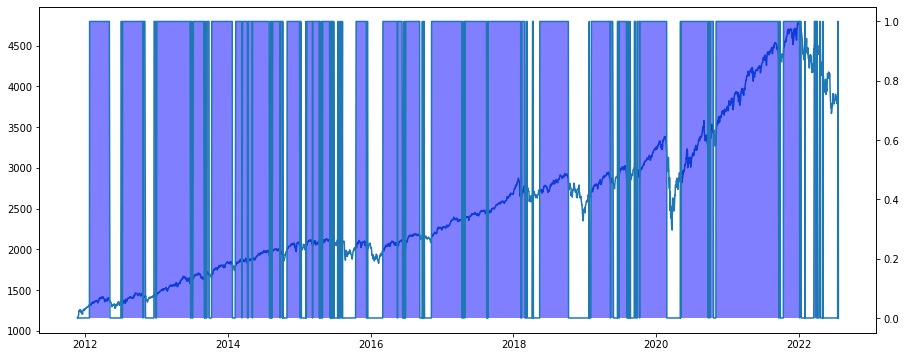

In [28]:
fig, ax1 = plt.subplots( figsize=(15,6) )

ax2 = ax1.twinx()

ax1.plot(trending_df[['^GSPC']])
ax2.plot(trending_df[['trending']])
ax2.fill_between(trending_df.index, 0, 1, where=trending_df['trending'] == True,facecolor='blue', alpha=0.5)
plt.savefig('..\\reports\\figures\\'+end.strftime('%Y-%m-%d')+'_SP500_trending.png', dpi=300, format='png', bbox_inches='tight')


correlations when trending
1919


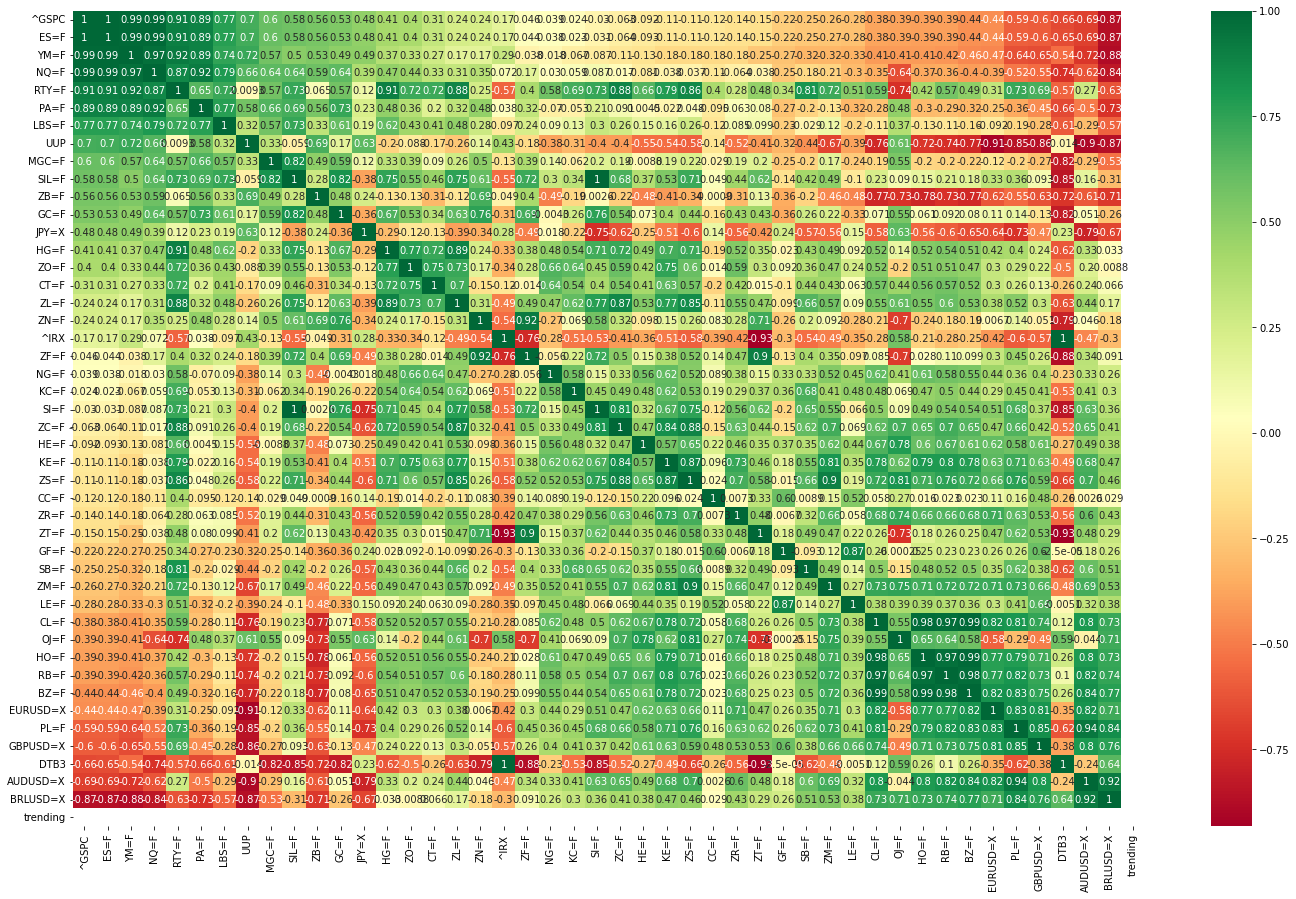

In [29]:
print("correlations when trending")
print(len(future_commodities_trending))

sorted_future_commodities_trending = future_commodities_trending.corr()[['^GSPC']].sort_values(by='^GSPC',ascending=False)

import seaborn as sns

plt.figure(figsize=(24,15))
sns.heatmap(future_commodities_trending[sorted_future_commodities_trending.index].corr(),cmap="RdYlGn",annot=True)
plt.savefig('..\\reports\\figures\\'+end.strftime('%Y-%m-%d')+'_sorted_by_GSPC_future_commodities_trending_corr.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

correlations when not trending
764


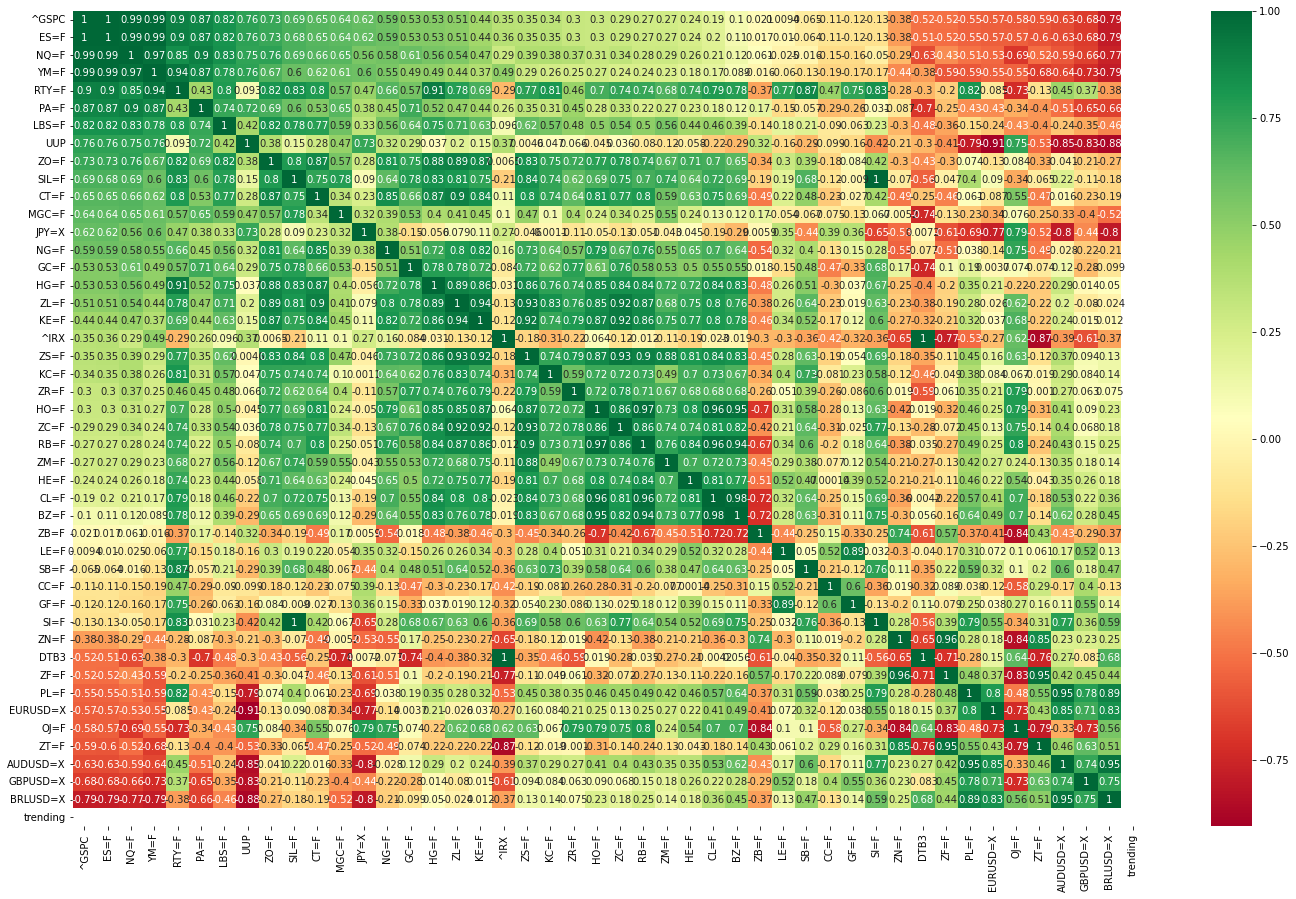

In [30]:
print("correlations when not trending")
print(len(future_commodities_not_trending))

sorted_future_commodities_not_trending = future_commodities_not_trending.corr()[['^GSPC']].sort_values(by='^GSPC',ascending=False)

import seaborn as sns

plt.figure(figsize=(24,15))
sns.heatmap(future_commodities_not_trending[sorted_future_commodities_not_trending.index].corr(),cmap="RdYlGn",annot=True)
plt.savefig('..\\reports\\figures\\'+end.strftime('%Y-%m-%d')+'_sorted_by_GSPC_future_commodities_not_trending_corr.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

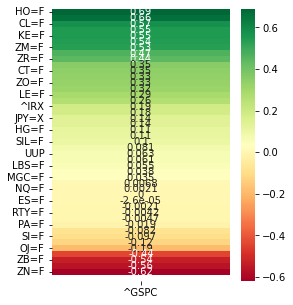

In [31]:
plt.figure(figsize=(4,5))
sns.heatmap((sorted_future_commodities_not_trending-sorted_future_commodities_trending).sort_values(by=['^GSPC'],ascending=False),cmap="RdYlGn",annot=True)
plt.savefig('..\\reports\\figures\\'+end.strftime('%Y-%m-%d')+'_sorted_by_GSPC_future_commodities_trending-not_trending_corr.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

In [32]:
import scipy

n = len(future_commodities_not_trending)

dist = scipy.stats.beta(n/2 - 1, n/2 - 1, loc=-1, scale=2)
p_not_trending = pd.DataFrame(2*dist.cdf(-abs(future_commodities_not_trending[sorted_future_commodities_not_trending.index].corr())),columns=future_commodities_not_trending.columns,index=sorted_future_commodities_not_trending.index)

n = len(future_commodities_trending)

dist = scipy.stats.beta(n/2 - 1, n/2 - 1, loc=-1, scale=2)
p_trending = pd.DataFrame(2*dist.cdf(-abs(future_commodities_trending[sorted_future_commodities_trending.index].corr())),columns=future_commodities_trending.columns,index=sorted_future_commodities_trending.index)
#p_trending = pd.DataFrame([2*dist.cdf(-abs(future_commodities_trending[sorted_future_commodities_trending.index].corr()))],columns=sorted_future_commodities_trending.columns,index=sorted_future_commodities_trending.index)


In [33]:
def highlight_cells(cell):
    #def inner(cell):
    color = 'green' if cell == True else ''
    return 'background-color: {}'.format(color)
    #return inner

In [34]:

temp_all_significant = pd.DataFrame((pd.DataFrame(p_not_trending)<.05)*(pd.DataFrame(p_trending)<.05)*(future_commodities_not_trending[sorted_future_commodities_not_trending.index].corr()*future_commodities_trending[sorted_future_commodities_trending.index].corr())>0)
temp_all_significant_inverted = pd.DataFrame((pd.DataFrame(p_not_trending)<.05)*(pd.DataFrame(p_trending)<.05)*(future_commodities_not_trending[sorted_future_commodities_not_trending.index].corr()*future_commodities_trending[sorted_future_commodities_trending.index].corr())<0)
temp_trend_significant = pd.DataFrame(pd.DataFrame(p_trending)<.05)
temp_not_trend_significant = pd.DataFrame(pd.DataFrame(p_not_trending)<.05)

combined = pd.concat([temp_trend_significant.loc[['^GSPC']].T,temp_not_trend_significant.loc[['^GSPC']].T,temp_all_significant.loc[['^GSPC']].T,temp_all_significant_inverted.loc[['^GSPC']].T],axis=1)
combined.columns = ['trend','not_trend','both','inverted']
display(combined.style.applymap(highlight_cells))



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  warnings.warn(


,trend,not_trend,both,inverted
DTB3,True,True,True,False
AUDUSD=X,True,True,True,False
BRLUSD=X,True,True,True,False
BZ=F,True,True,False,True
CC=F,True,True,True,False
CL=F,True,True,False,True
CT=F,True,True,True,False
ES=F,True,True,True,False
EURUSD=X,True,True,True,False
GBPUSD=X,True,True,True,False


In [54]:
#test

import pandas as pd
import datetime as dt
dates = []
for d in pd.read_csv('..\\data\\raw\\sample.csv')['Date']:
    dates.append(dt.datetime.strptime(d, '%d-%b-%y'))

temp = pd.read_csv('..\\data\\raw\\sample.csv',thousands=",")
temp.index = dates
temp = temp.iloc[:,1:]
temp.columns = ['Open','High','Low','Adj Close','Volume']
#temp['Close'] = temp['Close'].astype(float)
temp.sort_index(inplace=True)
temp['Symbol'] = 'Test'

temp_new = derive_price_supply_trends(['temp',temp,nyse_dates]).sort_index(ascending=False)
print(temp_new)
print(calculateMetrics(temp_new))
#


               Open     High      Low  Adj Close     Volume Symbol  \
2022-05-25  3929.59  3999.33  3925.03    3978.73   100000.0   temp   
2022-05-24  3942.94  3955.68  3875.13    3941.48   200000.0   temp   
2022-05-23  3919.42  3981.88  3909.04    3973.75   300000.0   temp   
2022-05-20  3927.76  3943.42  3810.32    3901.36   400000.0   temp   
2022-05-19  3899.00  3945.96  3876.58    3900.79   500000.0   temp   
...             ...      ...      ...        ...        ...    ...   
2017-10-09  2551.39  2551.82  2541.60    2544.73  1500000.0   temp   
2017-10-06  2547.44  2549.41  2543.79    2549.33  1600000.0   temp   
2017-10-05  2540.86  2552.51  2540.02    2552.07  1700000.0   temp   
2017-10-04  2533.48  2540.53  2531.80    2537.74  1800000.0   temp   
2017-10-03  2530.34  2535.13  2528.85    2534.58  1900000.0   temp   

            buy_volume_pct  sell_volume_pct  daily_buy_vol  daily_sell_vol  \
2022-05-25        2.606796        -0.277254   2.606796e+05   -2.772544e+04   
202

In [36]:
npa = []
for i in range(0,len([*SP1500,*indexes,*sectors])):
    npa.append([[*SP1500,*indexes,*sectors][i],start.strftime('%Y-%m-%d'),end.strftime('%Y-%m-%d')])
    
# = getStock(npa[0])
    
client = Client('192.168.3.100:8786')
#client = Client(n_workers=4,threads_per_worker=1)
client.restart()
future = client.map(getStock, npa)
results_prices = []
#my intent was to capture future objects vs results and this gave me results
for f in as_completed(future):
    if(f.status=="error"):
        results_prices.append("error")
    else:
        results_prices.append(f.result()) 
client.close()


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\distributed\client.py:1265: VersionMismatchWarning: Mismatched versions found

+-------------+---------------+---------------+---------------+
| Package     | client        | scheduler     | workers       |
+-------------+---------------+---------------+---------------+
| dask        | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| distributed | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| lz4         | 3.1.3         | 3.1.10        | 3.1.10        |
| python      | 3.9.7.final.0 | 3.9.9.final.0 | 3.9.9.final.0 |
| toolz       | 0.11.1        | 0.11.2        | 0.11.2        |
+-------------+---------------+---------------+---------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


In [37]:
npa = []
for i in range(0,len([*SP1500,*indexes,*sectors])):
    npa.append([[*SP1500,*indexes,*sectors][i]])

client = Client('192.168.3.100:8786')
#client = Client(n_workers=4,threads_per_worker=1)
client.restart()

future = client.map(getTickerData, npa)

results_ticker_data = []

#my intent was to capture future objects vs results and this gave me results
for f in as_completed(future):
    if(f.status=="error"):
        results_ticker_data.append("error")
    else:
        results_ticker_data.append(f.result()) 
#client.restart()
client.close()


In [38]:
print(results_ticker_data[0][1].info)
print(results_ticker_data[0][1].quarterly_balance_sheet)
print(results_ticker_data[0][1].quarterly_cashflow)
#print(results_ticker_data[0][1].quarterly_dividends)
print(results_ticker_data[0][1].quarterly_earnings)
print(results_ticker_data[0][1].quarterly_financials)


{'zip': '48167', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 10474, 'longBusinessSummary': 'Gentherm Incorporated designs, develops, manufactures, and markets thermal management technologies. The company operates in two segments, Automotive and Medical. The Automotive segment offers climate comfort systems, which include seat heaters, blowers, and thermoelectric devices for variable temperature climate control seats and steering wheel heaters that are designed to provide thermal comfort to automobile passengers; integrated electronic components, such as electronic control units that utilize proprietary electronics technology and software; and other climate comfort systems, including neck conditioners and climate control system products for door panels, armrests, cupholders, and storage bins. It also provides battery performance solutions comprising cell connecting devices and battery cable technologies used for various types of automotive batteries, as well as thermal managemen

In [39]:
results_ticker_data[0][1].info

{'zip': '48167',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 10474,
 'longBusinessSummary': 'Gentherm Incorporated designs, develops, manufactures, and markets thermal management technologies. The company operates in two segments, Automotive and Medical. The Automotive segment offers climate comfort systems, which include seat heaters, blowers, and thermoelectric devices for variable temperature climate control seats and steering wheel heaters that are designed to provide thermal comfort to automobile passengers; integrated electronic components, such as electronic control units that utilize proprietary electronics technology and software; and other climate comfort systems, including neck conditioners and climate control system products for door panels, armrests, cupholders, and storage bins. It also provides battery performance solutions comprising cell connecting devices and battery cable technologies used for various types of automotive batteries, as well as thermal manage

In [40]:
npa = []
results_ticker_names = [r[0] for r in results_ticker_data]
for n in range(0,len(results_ticker_names),1):
    npa.append([results_ticker_names[n],results_ticker_data[n][1]])

In [41]:

client = Client('192.168.3.100:8786')
#client = Client(n_workers=4,threads_per_worker=1)
client.restart()

future = client.map(extractTickerValues, npa)

results_ticker_values = []

#my intent was to capture future objects vs results and this gave me results
for f in as_completed(future):
    if(f.status=="error"):
        results_ticker_values.append("error")
    else:
        results_ticker_values.append(f.result()) 
client.close()

"""
trackers = ['beta','currentRatio','debtToEquity','dividendRate','dividendYield','earningsGrowth','ebitda','ebitdaMargins','forwardPE','freeCashflow','grossMargins','grossProfits','heldPercentInstitutions','industry','marketCap','operatingCashflow','operatingMargins','payoutRatio','pegRatio','priceToBook','priceToSalesTrailing12Months','profitMargins','quickRatio','returnOnAssets','returnOnEquity','revenueGrowth','revenuePerShare','sector','sharesOutstanding','shortRatio','totalAssets','totalCash','totalCashPerShare','totalDebt','totalRevenue','trailingPE']

for t in trackers:
    if(np.sum(np.where(subset.columns==t))==0):
        values = pd.concat([values,pd.DataFrame('error',index=[n_],columns=[t])],axis=1)
    else:
        values = pd.concat([values,pd.DataFrame(subset[t].values[0],index=[n_],columns=[t])],axis=1)
"""

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\distributed\client.py:1265: VersionMismatchWarning: Mismatched versions found

+-------------+---------------+---------------+---------------+
| Package     | client        | scheduler     | workers       |
+-------------+---------------+---------------+---------------+
| dask        | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| distributed | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| lz4         | 3.1.3         | 3.1.10        | 3.1.10        |
| python      | 3.9.7.final.0 | 3.9.9.final.0 | 3.9.9.final.0 |
| toolz       | 0.11.1        | 0.11.2        | 0.11.2        |
+-------------+---------------+---------------+---------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


"\ntrackers = ['beta','currentRatio','debtToEquity','dividendRate','dividendYield','earningsGrowth','ebitda','ebitdaMargins','forwardPE','freeCashflow','grossMargins','grossProfits','heldPercentInstitutions','industry','marketCap','operatingCashflow','operatingMargins','payoutRatio','pegRatio','priceToBook','priceToSalesTrailing12Months','profitMargins','quickRatio','returnOnAssets','returnOnEquity','revenueGrowth','revenuePerShare','sector','sharesOutstanding','shortRatio','totalAssets','totalCash','totalCashPerShare','totalDebt','totalRevenue','trailingPE']\n\nfor t in trackers:\n    if(np.sum(np.where(subset.columns==t))==0):\n        values = pd.concat([values,pd.DataFrame('error',index=[n_],columns=[t])],axis=1)\n    else:\n        values = pd.concat([values,pd.DataFrame(subset[t].values[0],index=[n_],columns=[t])],axis=1)\n"

In [42]:
import pickle

ticker_values = pd.DataFrame()

pickle_dumps = []

for r in results_ticker_values:
    if(r=='error'):
        pass
        #pd.DataFrame(np.repeat('error', len(trackers), axis = None),index=)
    else:                
        #print(r[1])
        subset = pd.DataFrame(r[1])
        subset.index = [r[0]]
        #print(subset)
        ticker_values = pd.concat([ticker_values,subset],axis=0)
        pickle_dumps.append([r[0],r[2]])
        #ticker_values = pd.concat([ticker_values,pd.DataFrame(r[1],index=[r[0]])],axis=0)

pd.DataFrame(ticker_values)

pickle.dump(pickle_dumps, open('..\\data\\interim\\fundamental.pkl', 'wb'))

In [43]:
"""
missing_ticker_values = list(set([*SP1500,*indexes,*sectors]).difference([n for n in pd.DataFrame(ticker_values).index]))
print(missing_ticker_values)

for r in range(0,len(missing_ticker_values)):
    r_ = missing_ticker_values[r]
    temp = pd.DataFrame(np.array([r_,*np.repeat('missing',len(pd.DataFrame(ticker_values.columns)))])).T.set_index(0)
    temp.columns = ticker_values.columns
    #.set_index(0).iloc[[0]].columns))])
    ticker_values = pd.concat([ticker_values,temp],axis=0)
"""


"\nmissing_ticker_values = list(set([*SP1500,*indexes,*sectors]).difference([n for n in pd.DataFrame(ticker_values).index]))\nprint(missing_ticker_values)\n\nfor r in range(0,len(missing_ticker_values)):\n    r_ = missing_ticker_values[r]\n    temp = pd.DataFrame(np.array([r_,*np.repeat('missing',len(pd.DataFrame(ticker_values.columns)))])).T.set_index(0)\n    temp.columns = ticker_values.columns\n    #.set_index(0).iloc[[0]].columns))])\n    ticker_values = pd.concat([ticker_values,temp],axis=0)\n"

In [44]:
market_data = pd.concat([ticker_values])

In [45]:
names_prices = [rp[0] for rp in results_prices]

#def process_df(data_):
npa = []    
for n in range(0,len(names_prices)):
    #print(names_prices[n])
    n_ = names_prices[n]
    npa.append([n_,results_prices[n][1],nyse_dates])
    
    
prices_df = pd.DataFrame()

client = Client('192.168.3.100:8786')
#client = Client(n_workers=4,threads_per_worker=1)
client.restart()

future = client.map(derive_price_supply_trends, npa)
#results_sectors = []
#my intent was to capture future objects vs results and this gave me results
for f in as_completed(future):
    if(f.status=="error"):
        #results_sectors.append("error")
        pass
    else:
        #results_sectors.append(f.result())
        prices_df = pd.concat([f.result(),prices_df],axis=0)
client.close()

In [55]:

npa = []
for s in names_prices:
    #print(s)
    subset = prices_df.iloc[np.where(prices_df['Symbol']==s)]
    if(len(subset)==0):
        pass
    else:
        npa.append(subset)

screenerMetrics = []

client = Client('192.168.3.100:8786')
#client = Client(n_workers=4,threads_per_worker=1)
client.restart()

future = client.map(calculateMetrics, npa)

#my intent was to capture future objects vs results and this gave me results
for f in as_completed(future):
    if(f.status=="error"):
        screenerMetrics.append("error")
    else:
        screenerMetrics.append(f.result()) 
client.close()



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\distributed\client.py:1265: VersionMismatchWarning: Mismatched versions found

+-------------+---------------+---------------+---------------+
| Package     | client        | scheduler     | workers       |
+-------------+---------------+---------------+---------------+
| dask        | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| distributed | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| lz4         | 3.1.3         | 3.1.10        | 3.1.10        |
| python      | 3.9.7.final.0 | 3.9.9.final.0 | 3.9.9.final.0 |
| toolz       | 0.11.1        | 0.11.2        | 0.11.2        |
+-------------+---------------+---------------+---------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


In [56]:
screener_metrics = pd.concat(screenerMetrics)

In [57]:

missing_screener_metrics = list(set([*SP1500,*indexes,*sectors]).difference([n for n in screener_metrics.index]))
print(missing_screener_metrics)

for r in range(0,len(missing_screener_metrics)):
    r_ = missing_screener_metrics[r]
    test = pd.DataFrame([np.repeat('missing',len(screener_metrics.columns))],index=[r_],columns=screener_metrics.columns)
    screener_metrics = pd.concat([screener_metrics,test],axis=0)

#pd.DataFrame(screener_metrics)

['JW-A']


In [58]:
#fundamentals_quarterlies = pickle.load(open('./fundamental.pkl', 'rb'))
fundamental_entries = [e[0] for e in pickle_dumps]#[e[0] for e in fundamentals_quarterlies]


In [59]:
#summary = pd.concat([prices_df[prices_df['Symbol']==name_][['Symbol','MIN_Lookback_One_Year', 'MIN_Lookback_2_Months', 'MIN_Lookback_1_Months','risk_trend_factor','risk_per_share','volume_factor']].iloc[[-1]].reset_index().set_index('Symbol') for name_ in np.unique(prices_df['Symbol'].values)]).reset_index()

In [60]:


sector_performance = []
for v in sectors:
    sector_performance.append([v,screener_metrics.loc[[v]]['risk_trend_factor'].values[0]])
temp_v = pd.concat([pd.DataFrame([dict_sectors_reverse[v] for v in sectors]),pd.DataFrame(sectors)],axis=1)
temp_v.columns = ['Sector','Symbol']
sectors_risk_sorted = pd.DataFrame(sector_performance,columns=['Symbol','risk_trend_factor']).merge(temp_v, on='Symbol', how='left').sort_values(by='risk_trend_factor',ascending=False)    
sectors_risk_sorted

,Symbol,risk_trend_factor,Sector
3,VDE,-0.654256,Energy
10,VPU,-1.515344,Utilities
5,VHT,-2.425986,Healthcare
8,VAW,-2.507988,Basic Materials
2,VDC,-2.611629,Consumer Defensive
9,VNQ,-4.227903,Real Estate
6,VIS,-4.289191,Industrials
4,VFH,-4.395834,Financial Services
7,VGT,-4.878169,Technology
1,VCR,-6.439638,Consumer Cyclical


In [61]:
index_performance = []
for v in indexes:
    index_performance.append([v,screener_metrics.loc[[v]]['20td_tvf_vel'].values[0]])
temp_i = pd.DataFrame(index_performance,index=indexes)
temp_i.columns = ['Symbol','risk_trend_factor']
index_risk_sorted = pd.DataFrame(index_performance,columns=['Symbol','20td_tvf_vel'],index=indexes).sort_values(by='20td_tvf_vel',ascending=False).reset_index()
index_risk_sorted.columns = ['Index','Symbol','risk_trend_factor']
index_risk_sorted

,Index,Symbol,risk_trend_factor
0,SPY,SPY,2.323657
1,SPTM,SPTM,NaN
2,SLY,SLY,NaN
3,MDYG,MDYG,NaN


In [62]:
#20td_tvf_vel

In [63]:

threshold = 0 
#stock_fundamentals = market_data
#screener = screener_metrics
#stock_indexes = sp1500_index_df


#spdr_indexes = indexes
#spdr_indexes.columns=['Symbol']
#vanguard_sectors = sectors
#vanguard_sectors.columns=['Symbol']
screener_metrics_w_sp1500index = screener_metrics.reset_index().rename(columns={'index': 'Symbol'}).merge(sp1500_index_df,on='Symbol',how='left')

screener_metrics_w_sp1500index_good = screener_metrics_w_sp1500index[screener_metrics_w_sp1500index['risk_trend_factor']!='missing']

risk_trend_threshold = screener_metrics_w_sp1500index_good['risk_trend_factor'].quantile(q=[threshold]).values[0]
stock_sectors = market_data['sector']

temp = stock_sectors.reset_index()
temp.columns = ['Symbol','Sector']
sector_merged = screener_metrics.reset_index().rename(columns={'index': 'Symbol'}).merge(temp, on='Symbol', how='right')
temp_sm = sector_merged.merge(sp1500_index_df, on='Symbol', how='left').set_index('Symbol')
#temp_sm.columns = ['risk_trend_factor', 'Sector', 'index']

temp_index_symbol_map = pd.concat([sp1500_index_df,pd.DataFrame([invert_dict_indexes[s] for s in sp1500_index_df['Market Index']])],axis=1)
temp_index_symbol_map.columns = ['Symbol','Market Index','Index Symbol']

index_sector_merged = temp_sm.merge(temp_index_symbol_map.iloc[:,[0,2]], on='Symbol', how='left')

"""
for spdr_ in range(0,len(indexes)):
    spdr__ = indexes[spdr_]
    #spdr__i = indexes[spdr_]
    #temp_sm.iloc[np.where(temp_sm.index==spdr__)][['index']] = spdr__i
    temp_sm.iloc[np.where(temp_sm.index==spdr__)][['index_Symbol']] = spdr__
    """

"\nfor spdr_ in range(0,len(indexes)):\n    spdr__ = indexes[spdr_]\n    #spdr__i = indexes[spdr_]\n    #temp_sm.iloc[np.where(temp_sm.index==spdr__)][['index']] = spdr__i\n    temp_sm.iloc[np.where(temp_sm.index==spdr__)][['index_Symbol']] = spdr__\n    "

In [64]:
risk_screened = screener_metrics_w_sp1500index_good[(screener_metrics_w_sp1500index_good['volume_factor']!= 'missing')]
risk_screened = risk_screened.merge(temp, on='Symbol', how='left')
print(risk_screened.columns)
#temp_df = risk_screened[['Symbol','Adj Close','MIN_Lookback_One_Year', 'MIN_Lookback_2_Months', 'MIN_Lookback_1_Months','risk_trend_factor','volume_factor','adf','hurst','Sector','Market Index']]
#temp_df.set_index('Symbol',inplace=True)
#pd.concat([temp_df,temp_sm],axis=0)

#screened_final_set = risk_screened

Index(['Symbol', 'Date', 'buy_volume_pct', 'sell_volume_pct', 'daily_buy_vol',
       'daily_sell_vol', 'net_daily_vol', '20td_trend_vol',
       '20td_tot_daily_vol', '20td_trend_vol', '20td_trend_vol_factor',
       '20td_tvf_rng_div_2', '20td_tvf_vel', 'MIN_Lookback_One_Year',
       'MIN_Lookback_2_Months', 'MIN_Lookback_1_Months', 'risk_trend_factor',
       'risk_per_share', 'volume_factor', 'Adj Close', '21dBOLD', '21dMA-TP',
       '21dBOLU', '90dSMA', '90dSDev', 'adf', 'hurst', 'Market Index',
       'Sector'],
      dtype='object')


In [65]:
threshold_value = screener_metrics_w_sp1500index_good.dropna()['20td_tvf_vel'].quantile([threshold])

In [66]:
risk_trend_factor_sector_dict = dict()
for s in sectors:
    risk_trend_factor_sector_dict[s] = screener_metrics.loc[[s]]['20td_tvf_vel'].values[-1]
    
risk_trend_factor_sector_dict['error']='error'

In [67]:
"""
inv_dict_map = {v: k for k, v in dict_indexes.items()}
inv_dict_map[np.nan] = 'error'
in_ = [inv_dict_map[t[0]] for t in temp_sm[['Market Index']].values]
se_ = [dict_sectors[t[0]] for t in temp_sm[['Sector']].values]
#temp_sm[['Sector','index']]
"""
#symbols_w_index_sector = pd.concat([pd.DataFrame(se_,columns=['index'],index=temp_sm.index),pd.DataFrame(in_,columns=['sector'],index=temp_sm.index)],axis=1)


"\ninv_dict_map = {v: k for k, v in dict_indexes.items()}\ninv_dict_map[np.nan] = 'error'\nin_ = [inv_dict_map[t[0]] for t in temp_sm[['Market Index']].values]\nse_ = [dict_sectors[t[0]] for t in temp_sm[['Sector']].values]\n#temp_sm[['Sector','index']]\n"

In [68]:
#symbols_w_index_sector

In [69]:
index_sector_merged

,Symbol,Date,buy_volume_pct,sell_volume_pct,daily_buy_vol,daily_sell_vol,net_daily_vol,20td_trend_vol,20td_tot_daily_vol,20td_trend_vol,...,21dBOLD,21dMA-TP,21dBOLU,90dSMA,90dSDev,adf,hurst,Sector,Market Index,Index Symbol
0,THRM,2022-07-21 00:00:00,26.090755,-0.036913,4615454.490914,-6529.903007,4608924.587907,103676521.826434,3716800.0,103676521.826434,...,56.584254,61.327143,66.070032,65.017183,4.224376,0.643903,0.435819,Consumer Cyclical,SP600,SLY
1,ANGO,2022-07-21 00:00:00,30.999332,-0.031251,3980314.285714,-4012.583707,3976301.702007,36567542.678763,5276300.0,36567542.678763,...,18.578356,20.163651,21.748946,19.938413,1.327242,0.429151,0.48253,Healthcare,SP600,SLY
2,MKTX,2022-07-21 00:00:00,4.674165,-0.176237,2617532.189209,-98692.941983,2518839.247226,231965967.738175,7345000.0,231965967.738175,...,254.137696,265.131112,276.124527,268.391072,9.033577,0.61698,0.480045,Financial Services,SP500,SPY
3,CDMO,2022-07-21 00:00:00,2.500014,-0.285713,2379012.964578,-271884.655957,2107128.308621,124221682.590954,13147400.0,124221682.590954,...,14.094717,16.791746,19.488775,14.502222,2.165478,0.701625,0.461718,Healthcare,SP600,SLY
4,IPG,2022-07-21 00:00:00,0.242105,-0.805085,956506.801801,-3180730.545372,-2224223.743572,455794613.837032,73906400.0,455794613.837032,...,26.354146,27.926349,29.498552,30.061712,2.302871,0.746526,0.478192,Communication Services,SP500,SPY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,SRC,2022-07-21 00:00:00,24.001017,-0.039998,9319595.015259,-15531.368001,9304063.647258,NaN,19396700.0,NaN,...,37.070228,39.698571,42.326915,40.723055,2.297071,0.221959,0.457791,Real Estate,SP400,MDYG
1516,SCVL,2022-07-21 00:00:00,21.999491,-0.043479,5387675.44027,-10648.061555,5377027.378715,18699604.495554,7525300.0,18699604.495554,...,19.627744,22.126826,24.625907,26.319167,3.63159,0.59346,0.460949,error,SP600,SLY
1517,XPER,2022-07-21 00:00:00,15.501144,-0.060602,5964840.400572,-23319.5946,5941520.805972,67292929.880203,8427900.0,67292929.880203,...,13.961754,14.860317,15.758881,15.508611,0.914109,0.008382,0.465792,error,SP600,SLY
1518,TROW,2022-07-21 00:00:00,23.999861,-0.04,27566240.671383,-45944.254927,27520296.416456,1624412945.723762,32194800.0,1624412945.723762,...,109.374118,115.941428,122.508739,119.434537,6.766602,0.467261,0.561,Financial Services,SP500,SPY


In [70]:
#pd.DataFrame([dict_sectors[s] for s in index_sector_merged['Sector']],columns=['Sector Symbol'],index=index_sector_merged['Symbol']
sector_symbols = pd.DataFrame([dict_sectors[s] for s in index_sector_merged['Sector']],index=index_sector_merged['Symbol'],columns=['Sector Symbol'])

symbols_w_sector_rtf = pd.DataFrame([risk_trend_factor_sector_dict[s] for s in sector_symbols['Sector Symbol']],columns=['sector_risk_trend_factor'],index=sector_symbols.index)

#screener_final = pd.concat([screener_metrics,symbols_w_index_sector.set_index),symbols_w_sector_rtf,index_sector_merged[['Market Index','Sector']]],axis=1)



In [71]:
screener_final = pd.concat([screener_metrics,symbols_w_sector_rtf,index_sector_merged.set_index('Symbol')[['Sector']],sector_symbols,index_sector_merged.set_index('Symbol')[['Market Index','Index Symbol']]],axis=1)

a = screener_final[screener_final['20td_tvf_vel'].apply(type) != np.str_].sort_values(by='20td_tvf_vel',ascending=False)
b = screener_final[screener_final['20td_tvf_vel'].apply(type) == np.str_]
screener_sorted = pd.concat([a,b],axis=0)

In [72]:
#pd.concat([screener_metrics.sort_values(by='risk_trend_factor',ascending=False).iloc[:,1:],symbols_w_index_sector,symbols_w_sector_rtf,temp_sm[['Market Index','Sector']]],axis=1)

In [73]:
list_sector_n_indexes = []
list_stocks = []
for i in index_risk_sorted['Symbol'].values:
    list_sector_n_indexes.append(i)
for i in sectors_risk_sorted['Symbol'].values:
    list_sector_n_indexes.append(i)
#for i in screened_final_set['Symbol'].values:
for i in sp1500_index_df['Symbol'].values:
    list_stocks.append(i)
stocks_ = list_stocks
#stocks_ = np.unique(list_stocks, return_index=True)[1]
#list__ = [list_[symbol] for symbol in sorted(stocks_)]
#list__ = ['MCK','MPC','APA','LNTH','MUSA','CIVI','VAW','VGT','EQT','XOM','DVN','MRO','EOG','HES','CEIX','SM','RRC','MUR','MTDR','PXD','OXY','PDCE','NFG','FANG','TWI','PBF','MANT','HRB','VDC','ACC','GO','TVTY','FCN','VIVO']

In [74]:
#screener_sorted.head(50)

In [75]:
"""
rick_screener_final = rick_screener.dropna()[rick_screener.dropna()['risk_trend_factor'].values > threshold_value.values[0]]
rick_screener_final = pd.concat([rick_screener,rick_screener_final],axis=0).drop_duplicates(keep='last')

diff_ = np.setdiff1d(np.array([*list_sector_n_indexes,*stocks_]),rick_screener_final.index)

for d in diff_:
    rick_screener_final = pd.concat([rick_screener_final,pd.DataFrame([np.repeat(np.nan, len(rick_screener_final.columns))],columns=rick_screener_final.columns,index=[d])],axis=0)
    
rick_screener_final.loc[np.setdiff1d([*rick_screener_final.index],list_sector_n_indexes)].sort_values(by='risk_trend_factor',ascending=False).to_csv('rick_screener_final.csv')
"""
#screener_sorted.loc[np.setdiff1d([*screener_final.index],list_sector_n_indexes)].head(50)
screener_sorted.to_csv('..\\data\\processed\\'+end.strftime('%Y-%m-%d')+'_screener_sorted.csv')
screener_sorted.to_csv('..\\data\\processed\\screener_sorted.csv')

In [76]:
#screener_final.loc[np.setdiff1d([*screener_final.index],list_sector_n_indexes)]['risk_trend_factor']

In [77]:
npa = []
for f in FRED_Indicators:
    npa.append([f,start.strftime('%Y-%m-%d'),end.strftime('%Y-%m-%d'),nyse_dates])

In [78]:
completed_fred = pd.DataFrame()

client = Client('192.168.3.100:8786')
#client = Client(n_workers=4,threads_per_worker=1)
client.restart()

future = client.map(Fred_Data, npa)

#my intent was to capture future objects vs results and this gave me results
for f in as_completed(future):
    if(f.status=="error"):
        pass
    else:
        completed_fred = pd.concat([completed_fred,f.result()],axis=0)
client.close()

completed_fred_pvt = pd.pivot_table(completed_fred, values=['Value'], index=completed_fred.index,columns=['Symbol'])
completed_fred_pvt

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\distributed\client.py:1265: VersionMismatchWarning: Mismatched versions found

+-------------+---------------+---------------+---------------+
| Package     | client        | scheduler     | workers       |
+-------------+---------------+---------------+---------------+
| dask        | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| distributed | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| lz4         | 3.1.3         | 3.1.10        | 3.1.10        |
| python      | 3.9.7.final.0 | 3.9.9.final.0 | 3.9.9.final.0 |
| toolz       | 0.11.1        | 0.11.2        | 0.11.2        |
+-------------+---------------+---------------+---------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Value                                                   \
Symbol     ASPUS AWHAETP B432RG3A086NBEA BAA10Y BACDINA066MNFRBNY   
2017-03-23   NaN     NaN             NaN   2.24               NaN   
2017-03-24   NaN     NaN             NaN   2.22               NaN   
2017-03-27   NaN     NaN             NaN   2.23               NaN   
2017-03-28   NaN     NaN             NaN   2.22               NaN   
2017-03-29   NaN     NaN             NaN   2.23               NaN   
...          ...     ...             ...    ...               ...   
2022-07-18   NaN     NaN             NaN   2.28               NaN   
2022-07-19   NaN     NaN             NaN   2.26               NaN   
2022-07-20   NaN     NaN             NaN   2.20               NaN   
2022-07-21   NaN     NaN             NaN    NaN               NaN   
2022-07-22   NaN     NaN             NaN    NaN               NaN   

                                                                       \
Symbol     BACTSAMFRBDAL BAMLC0A0CM BAMLCC0A1AAATRIV BAMLCC0A4BBBTRIV   
2017-03-23           NaN       1.23           595.72           774.21   
2017-03-24           NaN       1.23           597.47           775.47   
2017-03-27           NaN       1.23           598.45           776.64   
2017-03-28           NaN       1.22           597.00           775.42   
2017-03-29           NaN       1.22           598.52           776.88   
...                  ...        ...              ...              ...   
2022-07-18           NaN       1.55           670.59           864.84   
2022-07-19           NaN       1.54           667.60           862.49   
2022-07-20           NaN       1.52           668.53           863.23   
2022-07-21           NaN       1.52           676.66           871.22   
2022-07-22           NaN        NaN              NaN              NaN   

                        ...                                                  \
Symbol     BAMLH0A3HYC  ... VIXCLS VXVCLS  WDFUELLA    WGS3MO WILLLRGCAPVAL   
2017-03-23        8.67  ...  13.12  14.91       NaN       NaN      71187.54   
2017-03-24        8.59  ...  12.96  14.55  1.528000  0.770000      71066.97   
2017-03-27        8.67  ...  12.50  14.23  1.558429  0.774286      70927.03   
2017-03-28        8.58  ...  11.53  13.68  1.568571  0.775714      71380.50   
2017-03-29        8.47  ...  11.42  13.43  1.578714  0.777143      71397.72   
...                ...  ...    ...    ...       ...       ...           ...   
2022-07-18       11.64  ...  25.30  27.82       NaN       NaN     113380.58   
2022-07-19       11.48  ...  24.50  27.31       NaN       NaN     116031.62   
2022-07-20       11.25  ...  23.88  26.70       NaN       NaN     116087.77   
2022-07-21       11.28  ...  23.11  26.22       NaN       NaN     116573.22   
2022-07-22         NaN  ...    NaN    NaN       NaN       NaN           NaN   

                                                                
Symbol     WILLMICROCAPPR WPU0911 WPU101 WPUSI019011    WTB3MS  
2017-03-23       12163.03     NaN    NaN         NaN       NaN  
2017-03-24       12188.82     NaN    NaN         NaN  0.760000  
2017-03-27       12259.95     NaN    NaN         NaN  0.764286  
2017-03-28       12331.93     NaN    NaN         NaN  0.765714  
2017-03-29       12405.18     NaN    NaN         NaN  0.767143  
...                   ...     ...    ...         ...       ...  
2022-07-18       13019.84     NaN    NaN         NaN       NaN  
2022-07-19       13357.87     NaN    NaN         NaN       NaN  
2022-07-20       13599.67     NaN    NaN         NaN       NaN  
2022-07-21       13613.74     NaN    NaN         NaN       NaN  
2022-07-22            NaN     NaN    NaN         NaN       NaN  

[1344 rows x 145 columns]

In [79]:
npa = []
for e in etf_bonds:
    npa.append([e,start.strftime('%Y-%m-%d'),end.strftime('%Y-%m-%d'),nyse_dates])
    
completed_bonds = pd.DataFrame()

client = Client('192.168.3.100:8786')
#client = Client(n_workers=4,threads_per_worker=1)
client.restart()

future = client.map(dl, npa)

#my intent was to capture future objects vs results and this gave me resultsa
for f in as_completed(future):
    if(f.status=="error"):
        pass
    else:
        completed_bonds = pd.concat([completed_bonds,f.result()],axis=0)
client.close()

completed_bonds_pvt = pd.pivot_table(completed_bonds, values='Close', index=completed_bonds.index,columns=['Symbol'])
completed_bonds_pvt

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\distributed\client.py:1265: VersionMismatchWarning: Mismatched versions found

+-------------+---------------+---------------+---------------+
| Package     | client        | scheduler     | workers       |
+-------------+---------------+---------------+---------------+
| dask        | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| distributed | 2022.01.1     | 2021.11.2     | 2021.11.2     |
| lz4         | 3.1.3         | 3.1.10        | 3.1.10        |
| python      | 3.9.7.final.0 | 3.9.9.final.0 | 3.9.9.final.0 |
| toolz       | 0.11.1        | 0.11.2        | 0.11.2        |
+-------------+---------------+---------------+---------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


Symbol,AGG,AGZ,BIL,GBF,GOVT,IEF,IEI,ILTB,IMTB,ISTB,IUSB,LQD,MEAR,MUB,NEAR,SHV,SHY,SUB,TLT
2017-03-23,95.678299,102.766541,87.281425,102.452026,22.861429,96.810913,113.881485,50.582623,42.478519,45.253651,43.931034,100.191925,47.477570,96.728493,46.260952,104.670845,79.386589,100.005585,107.824677
2017-03-24,95.598862,102.739227,87.300537,102.506561,22.861429,96.866028,113.890732,50.582623,42.449993,45.253651,43.931034,100.294144,47.477570,96.790802,46.288612,104.661362,79.386589,100.015099,108.209587
2017-03-27,95.828285,102.666542,87.300537,102.670265,22.897966,97.104774,114.039024,50.945267,42.487164,45.280746,44.000824,100.507133,47.354126,96.942101,46.288612,104.651840,79.414795,99.986664,108.701904
2017-03-28,95.607712,102.684708,87.300537,102.642975,22.861429,96.774185,113.807289,50.632092,42.445694,45.217487,43.931034,100.294144,47.487061,96.879791,46.270164,104.661362,79.377197,100.043488,107.976837
2017-03-29,95.819458,102.621101,87.300537,102.724823,22.897966,97.049644,114.011223,50.937042,42.445694,45.280746,44.096802,100.617905,47.382607,97.075539,46.279369,104.689804,79.424187,100.043488,108.621346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,102.250000,109.910004,91.419998,107.989998,23.950001,102.750000,119.279999,56.200001,44.957001,47.299999,47.000000,111.830002,49.799999,107.449997,49.220001,110.010002,82.570000,104.839996,116.139999
2022-07-18,101.919998,109.779999,91.419998,107.610001,23.879999,102.449997,119.110001,55.639999,44.834999,47.259998,46.860001,111.050003,49.810001,107.250000,49.189999,110.000000,82.519997,104.779999,114.930000
2022-07-19,101.779999,109.550003,91.419998,107.449997,23.799999,101.980003,118.769997,55.750000,44.865002,47.250000,46.860001,111.360001,49.790001,107.190002,49.189999,110.000000,82.430000,104.820000,114.309998
2022-07-20,101.709999,109.610001,91.419998,107.370003,23.780001,101.879997,118.660004,55.910000,44.825001,47.220001,46.860001,111.239998,49.799999,107.370003,49.209999,110.010002,82.419998,104.800003,114.610001


In [80]:
#writer = pd.ExcelWriter('SP1500_screener_multiple.xlsx', engine='xlsxwriter')

data_object = [start,end,prices_df, sp1500_index_df, sp500, sp600, sp400, market_data, completed_fred_pvt, completed_bonds, completed_bonds_pvt, pd.DataFrame(sectors,sector_names), pd.DataFrame(indexes,index_names), screener_sorted, dict_sectors, dict_indexes, dict_sectors_reverse,invert_dict_indexes, list_sector_n_indexes, list_stocks]
               
pickle.dump(data_object, open('..\\data\\interim\\data_object.pkl', 'wb'))
"""
#prices_df.to_excel(writer, sheet_name='SP1500_Sectors_Indexes_Prices')
#prices_df.drop(['Sector', 'Market Cap'], axis=1).to_excel(writer, sheet_name='SP1500Prices')

#sectors_df.to_excel(writer, sheet_name='stock_sectors')

#mktcap_df.to_excel(writer, sheet_name='market_caps')

sp1500_index_df.to_excel(writer, sheet_name='SP1500')

pd.DataFrame(sp500).to_excel(writer, sheet_name='SP500')
pd.DataFrame(sp600).to_excel(writer, sheet_name='SP600')
pd.DataFrame(sp400).to_excel(writer, sheet_name='SP400')
pd.DataFrame(market_data).to_excel(writer, sheet_name='Stock_Fundamentals')
completed_fred_pvt.to_excel(writer, sheet_name='completed_fred_pvt')
completed_bonds.to_excel(writer, sheet_name='completed_bonds')
completed_bonds_pvt.to_excel(writer, sheet_name='completed_bonds_pvt')
pd.DataFrame(pd.DataFrame(sectors,sector_names)).to_excel(writer, sheet_name='vanguard_sectors')
pd.DataFrame(pd.DataFrame(indexes,index_names)).to_excel(writer, sheet_name='spdr_indexes')
screener_metrics.to_excel(writer, sheet_name='Screener')

writer.save()

wb = openpyxl.load_workbook('SP1500_screener_multiple.xlsx')
#openpyxl.Workbook()
new_range = openpyxl.workbook.defined_name.DefinedName('Prices', attr_text='SP1500_Sectors_Indexes_Prices!$A$1:$H$'+str(len(prices_df)+1))
wb.defined_names.append(new_range)
new_range = openpyxl.workbook.defined_name.DefinedName('SP1500', attr_text='SP1500!$B$1:$C$'+str(len(sp1500_index_df)+1))
wb.defined_names.append(new_range)
new_range = openpyxl.workbook.defined_name.DefinedName('Vanguard_Sectors', attr_text='vanguard_sectors!$B$1:$C$'+str(len(sectors)+1))
wb.defined_names.append(new_range)
new_range = openpyxl.workbook.defined_name.DefinedName('SPDR_Indexes', attr_text='spdr_indexes!$B$1:$C$'+str(len(indexes)+1))
wb.defined_names.append(new_range)


#wb.defined_names.append(new_range)
wb.save('SP1500_screener_multiple.xlsx')
wb.close()
#named_range = NamedRange("test_nr", [(new_sheet, "A1")])
#wb.add_named_range(new_range)
wb.close()
writer.close()
"""
"""
workbook = xlsxwriter.Workbook('SP1500_screener_multiple.xlsx')
workbook.define_name('Prices', '=SP1500Prices!$A$1:$J$'+str(len(prices_df)+1))
workbook.define_name('Sectors', '=stock_sectors!$A$1:$B$'+str(len(sectors_df)+1))
workbook.define_name('market_caps', '=market_caps!$A$1:$B$'+str(len(mktcap_df)+1))
workbook.define_name('SP1500', '=SP1500!$B$1:$C$'+str(len(sp1500_index_df)+1))

workbook.close()
"""

"\nworkbook = xlsxwriter.Workbook('SP1500_screener_multiple.xlsx')\nworkbook.define_name('Prices', '=SP1500Prices!$A$1:$J$'+str(len(prices_df)+1))\nworkbook.define_name('Sectors', '=stock_sectors!$A$1:$B$'+str(len(sectors_df)+1))\nworkbook.define_name('market_caps', '=market_caps!$A$1:$B$'+str(len(mktcap_df)+1))\nworkbook.define_name('SP1500', '=SP1500!$B$1:$C$'+str(len(sp1500_index_df)+1))\n\nworkbook.close()\n"